**AIVLE School 미니프로젝트**
### **공공데이터를 활용한 <span style="color:darkgreen">미세먼지 농도</span> 예측**
---

#### **<span style="color:red">[미션 안내]</span>**
* 개인 미션: 미세먼지 농도를 예측하는 머신러닝 모델을 만드세요. ([2-1]부터 [2-10], [3-1]부터 [3-2] 까지 미션 수행)
* 조별 미션: 개인 미션 수행한 내용에 대해 토론하여 발표 준비를 해주세요.

#### **<span style="color:red">[주피터 노트북 파일 안내]</span>**
1. 탐색적 데이터 분석(solution).ipynb: 미션 수행 대상 아님. 제공된 solution을 참고하여 [2-1]부터의 미션 수행을 위한 탐색적 데이터 분석 진행</br>
2. 데이터 전처리.ipynb: [2-1]부터 [2-10] 까지 미션 수행 대상</br>
3. 모델링(머신러닝).ipynb: [3-1]부터 [3-2] 까지 미션 수행 대상. [4-1]~[4-4]는 선택 사항임</br>

#### **<span style="color:red">[데이터 설명]</span>**

* air_2021.csv : 2021년 미세먼지 데이터
* air_2022.csv : 2022년 미세먼지 데이터
* weather_2021.csv : 2021년 날씨 데이터
* weather_2022.csv : 2022년 날씨 데이터
* 학습 데이터: 2021년의 미세먼지 농도 데이터, 테스트 데이터: 2022년의 미세먼지 농도 데이터

# [Step 1] 탐색적 데이터 분석

#### **<span style="color:blue">[1-1] 필요한 라이브러리 설치</span>**

In [2]:
# 필요한 라이브러리 설치 및 임포트
%pip install pandas seaborn

import pandas as pd
import seaborn as sns
import matplotlib as plt

Note: you may need to restart the kernel to use updated packages.


---

#### **<span style="color:blue">[1-2] 미세먼지 데이터 불러오기</span>**

* Pandas 라이브러리를 활용해서 'air_2021.csv'파일을 'air_21' 변수에, 'air_2022.csv'파일을 'air_22' 변수에 저장하고 그 데이터를 확인하세요.
* 구분자(sep) : ','
* encoder = 'utf-8'
* index_col = 0

In [4]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
# 'air_2021.csv'파일을 'air_21' 변수에, 'air_2022.csv'파일을 'air_22' 변수에 저장

air_21 = pd.read_csv("C:/Users/admin/Desktop/에이블 실습/miniproject2/air_2021.csv", sep=',', index_col = 0, encoding = 'utf-8' )
air_22 = pd.read_csv("C:/Users/admin/Desktop/에이블 실습/miniproject2/air_2022.csv", sep=',', index_col = 0, encoding = 'utf-8' )

In [5]:
# air_21 데이터의 head 확인

air_21.head()

,지역,망,측정소코드,측정소명,측정일시,SO2,CO,O3,NO2,PM10,PM25,주소
0,서울 종로구,도시대기,111123,종로구,2021100101,0.003,0.6,0.002,0.039,31.0,18.0,서울 종로구 종로35가길 19
1,서울 종로구,도시대기,111123,종로구,2021100102,0.003,0.6,0.002,0.035,27.0,16.0,서울 종로구 종로35가길 19
2,서울 종로구,도시대기,111123,종로구,2021100103,0.003,0.6,0.002,0.033,28.0,18.0,서울 종로구 종로35가길 19
3,서울 종로구,도시대기,111123,종로구,2021100104,0.003,0.6,0.002,0.030,26.0,16.0,서울 종로구 종로35가길 19
4,서울 종로구,도시대기,111123,종로구,2021100105,0.003,0.5,0.003,0.026,26.0,16.0,서울 종로구 종로35가길 19


In [7]:
# air_21 데이터의 shape 확인

air_21.shape

(8760, 12)

In [8]:
# air_22 데이터의 head 확인

air_22.head()

,지역,망,측정소코드,측정소명,측정일시,SO2,CO,O3,NO2,PM10,PM25,주소
0,서울 종로구,도시대기,111123,종로구,2022010101,0.003,0.4,0.026,0.016,23.0,12.0,서울 종로구 종로35가길 19
1,서울 종로구,도시대기,111123,종로구,2022010102,0.003,0.4,0.022,0.020,20.0,9.0,서울 종로구 종로35가길 19
2,서울 종로구,도시대기,111123,종로구,2022010103,0.003,0.5,0.014,0.028,20.0,9.0,서울 종로구 종로35가길 19
3,서울 종로구,도시대기,111123,종로구,2022010104,0.003,0.5,0.016,0.027,19.0,10.0,서울 종로구 종로35가길 19
4,서울 종로구,도시대기,111123,종로구,2022010105,0.003,0.5,0.005,0.040,24.0,11.0,서울 종로구 종로35가길 19


In [9]:
# air_22 데이터의 shape 확인

air_22.shape

(2160, 12)

---

#### **<span style="color:blue">[1-3] 날씨 데이터 불러오기</span>**

* Pandas 라이브러리를 활용해서 'weather_2021.csv'파일을 'weather_21' 변수에, 'weather_2022.csv'파일을 'weather_22' 변수에 저장하고 그 데이터를 확인하세요.
* 구분자(sep) : ','
* encoder = 'cp949'

In [6]:
#'weather_2021.csv'파일을 'weather_21' 변수에, 'weather_2022.csv'파일을 'weather_22' 변수에 저장

weather_21 = pd.read_csv("C:/Users/admin/Desktop/에이블 실습/miniproject2/weather_2021.csv", sep = ',', encoding='cp949')
weather_22 = pd.read_csv("C:/Users/admin/Desktop/에이블 실습/miniproject2/weather_2022.csv", sep = ',', encoding='cp949')

In [11]:
# 미세먼지 데이터와 같이 날씨 데이터의 head, shape 등을 확인

weather_22.shape

(2160, 38)

---

#### **<span style="color:blue">[1-4] 데이터 변수 확인</span>**

In [12]:
# 각 데이터프레임의 info 확인

air_21.info()
weather_21.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8760 entries, 0 to 8759
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   지역      8760 non-null   object 
 1   망       8760 non-null   object 
 2   측정소코드   8760 non-null   int64  
 3   측정소명    8760 non-null   object 
 4   측정일시    8760 non-null   int64  
 5   SO2     8648 non-null   float64
 6   CO      8680 non-null   float64
 7   O3      8663 non-null   float64
 8   NO2     8680 non-null   float64
 9   PM10    8655 non-null   float64
 10  PM25    8663 non-null   float64
 11  주소      8760 non-null   object 
dtypes: float64(6), int64(2), object(4)
memory usage: 889.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8759 entries, 0 to 8758
Data columns (total 38 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   지점             8759 non-null   int64  
 1   지점명            8759 non-null   object 
 2   일시             8759 non

In [13]:
# 아래에 필요한 코드를 작성하고 결과를 확인합니다.



In [14]:
# 아래에 필요한 코드를 작성하고 결과를 확인합니다.



---

#### **<span style="color:blue">[1-5] 미세먼지 데이터 분석</span>**

* 데이터 전처리와 모델링을 위해 데이터 분석을 진행해보세요. 시각화 등을 통해 관측치들의 패턴 탐색, 잘못된 자료 탐색, 변수들간의 관계 파악을 할 수 있습니다.

In [15]:
# 시각화 한글폰트 설정 (아래 코드를 실행하세요)

plt.rc('font', family='Malgun Gothic')
sns.set(font="Malgun Gothic",#"NanumGothicCoding", 
        rc={"axes.unicode_minus":False}, # 마이너스 부호 깨짐 현상 해결
        style='darkgrid')

<AxesSubplot:>

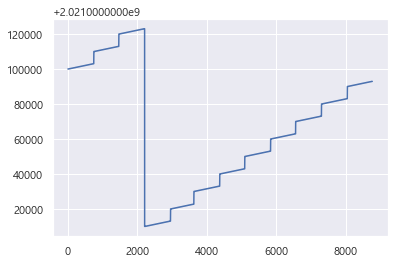

In [16]:
# air_21,air_22 의 다양한 변수에 대하여 시각화

air_21['측정일시'].plot.line()



<AxesSubplot:>

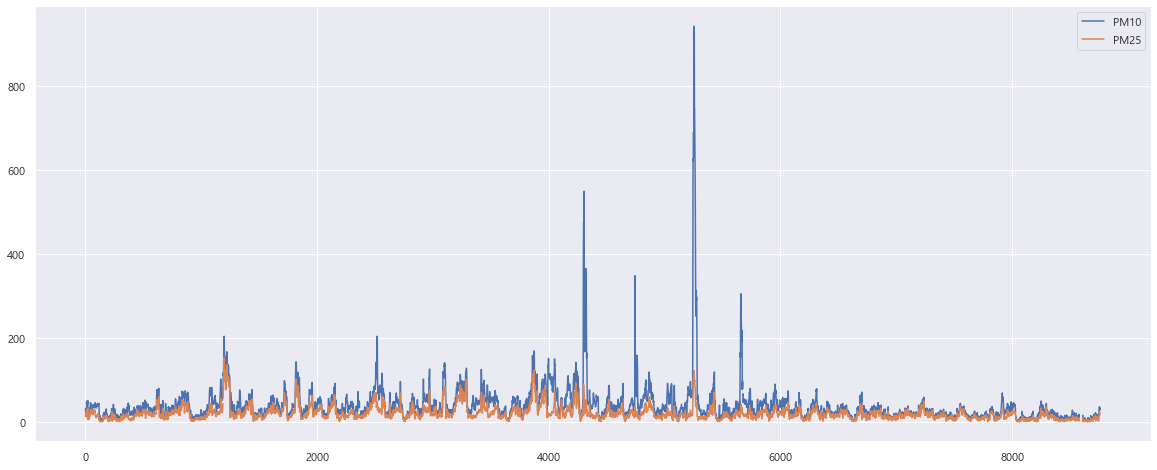

In [17]:
# 아래에 필요한 코드를 작성하고 결과를 확인합니다.

air_21[['PM10','PM25']].plot.line(figsize=(20,8))



In [18]:
# 아래에 필요한 코드를 작성하고 결과를 확인합니다.




In [19]:
# 시각화를 통해 알게된 사실을 정리해봅니다.
# 1. 
# 2.
# 3.

---

#### **<span style="color:blue">[1-6] 날씨 데이터 분석</span>**

In [20]:
weather_21

,지점,지점명,일시,기온(°C),기온 QC플래그,강수량(mm),강수량 QC플래그,풍속(m/s),풍속 QC플래그,풍향(16방위),...,최저운고(100m ),시정(10m),지면상태(지면상태코드),현상번호(국내식),지면온도(°C),지면온도 QC플래그,5cm 지중온도(°C),10cm 지중온도(°C),20cm 지중온도(°C),30cm 지중온도(°C)
0,108,서울,2021-01-01 01:00,-8.7,NaN,NaN,NaN,2.4,NaN,270.0,...,NaN,2000,NaN,NaN,-6.9,NaN,-1.0,-0.8,0.3,1.6
1,108,서울,2021-01-01 02:00,-9.1,NaN,NaN,NaN,1.6,NaN,270.0,...,NaN,2000,NaN,NaN,-7.1,NaN,-1.1,-0.8,0.3,1.6
2,108,서울,2021-01-01 03:00,-9.3,NaN,NaN,NaN,1.1,NaN,250.0,...,NaN,2000,NaN,NaN,-7.3,NaN,-1.2,-0.9,0.3,1.6
3,108,서울,2021-01-01 04:00,-9.3,NaN,NaN,NaN,0.3,NaN,0.0,...,NaN,2000,NaN,NaN,-7.5,NaN,-1.3,-1.0,0.2,1.5
4,108,서울,2021-01-01 05:00,-9.7,NaN,NaN,NaN,1.9,NaN,20.0,...,NaN,2000,NaN,NaN,-7.6,NaN,-1.3,-1.0,0.2,1.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8754,108,서울,2021-12-31 19:00,-6.4,NaN,NaN,NaN,2.2,NaN,250.0,...,NaN,2000,NaN,NaN,-4.5,NaN,-0.5,-0.7,-0.1,1.0
8755,108,서울,2021-12-31 20:00,-6.3,NaN,NaN,NaN,4.1,NaN,320.0,...,NaN,2000,NaN,NaN,-5.3,NaN,-0.6,-0.8,-0.1,1.0
8756,108,서울,2021-12-31 21:00,-6.7,NaN,NaN,NaN,4.8,NaN,320.0,...,NaN,2000,NaN,NaN,-5.7,NaN,-0.7,-0.8,-0.1,1.0
8757,108,서울,2021-12-31 22:00,-7.5,NaN,NaN,NaN,3.0,NaN,320.0,...,NaN,2000,NaN,NaN,-6.2,NaN,-0.8,-0.9,-0.2,1.0


<AxesSubplot:>

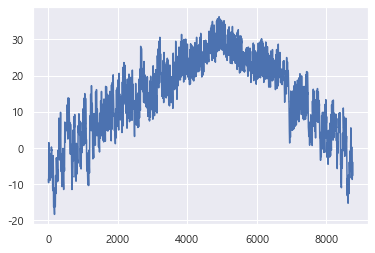

In [21]:
# weather_21,weather_22 의 다양한 변수에 대하여 시각화

weather_21['기온(°C)'].plot.line()



<AxesSubplot:>

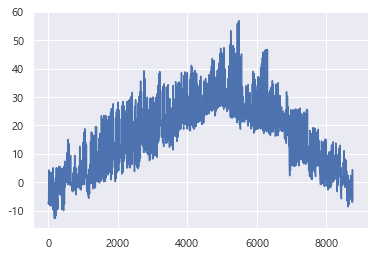

In [22]:
# 아래에 필요한 코드를 작성하고 결과를 확인합니다.

weather_21['지면온도(°C)'].plot.line()



In [23]:
# 아래에 필요한 코드를 작성하고 결과를 확인합니다.





In [24]:
# 시각화를 통해 알게된 사실을 정리해봅니다.
# 1. 
# 2.
# 3.